<a href="https://colab.research.google.com/github/patternproject/r.sb.pos.2/blob/main/Separate_NorthSouth_Data_v12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#READ ME

##Analysis of Survey Data for POS
##Iteration 2
##Using R

This file takes in "Extract of Daily POS Data" in excel format and outputs two files, one for North and other for South region

#History

v1: First Iteration

v2: First run of North and South completed

v3: Changed write xlsx to incoporate multiple sheets. Added System Date to Output File Name

v4: Adding create "survey summary" section from "Survey-Summary" colab 

v5: Continuation of v4. Fixing Special characters in Col Names

v6: Continuation of v5. Restructured Code

v7: Fixing Col Names for Without POS

v8: Adding Basic Graphs

v9: Automate UniVariate Analysis using PURRR

v10: Continuation of v9

v11: Continuation of v10. Moving from count to proportions

v12: Continuation of v11

## Setup

In [1]:
# Library
library(ggplot2)
library(tidyverse)
#install.packages("readxl")
library(readxl)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
# conditional install - Janitor
list.of.packages <- c("janitor")
new.packages <- list.of.packages[!(list.of.packages %in% installed.packages()[,"Package"])]
if(length(new.packages)) install.packages(new.packages)

library(janitor)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘snakecase’



Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




In [3]:
# conditional install - openxlsx

list.of.packages <- c("openxlsx")
new.packages <- list.of.packages[!(list.of.packages %in% installed.packages()[,"Package"])]
if(length(new.packages)) install.packages(new.packages)

library(openxlsx)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zip’




# Setting Input Files

In [7]:
# With POS File
input_file = '/content/With - Survey Summary Report_ 20201109.xlsx'


In [8]:
# Without POS File
input_file_2 = '/content/Without - Survey Summary Report_ 20201109.xlsx'

# With POS

In [9]:
# reading in input File
#input_file = '/content/WITH - Survey Summary Report_ 20201104.xlsx'
df_master = read_xlsx(input_file, sheet=1)


In [10]:
# printing DF
print(as_tibble(df_master))

# A tibble: 203 x 43
   Date                RespondentId EmployeeCode UserName BusinessUnit
   <dttm>                     <dbl>        <dbl> <chr>    <chr>       
 1 2020-10-24 00:00:00         6857        37636 Burhan … Managment   
 2 2020-10-24 00:00:00         6867        37636 Burhan … Managment   
 3 2020-10-24 00:00:00         6868        37636 Burhan … Managment   
 4 2020-10-24 00:00:00         6874        37636 Burhan … Managment   
 5 2020-10-25 00:00:00         6879        30919 Farasat… Customer Se…
 6 2020-10-28 00:00:00         6898        37459 Muhamma… Customer Se…
 7 2020-10-28 00:00:00         6905        37459 Muhamma… Customer Se…
 8 2020-10-26 00:00:00         6910        32117 Osama S… Customer Se…
 9 2020-11-02 00:00:00         6911        36750 Muhamma… Customer Se…
10 2020-10-28 00:00:00         6917        36814 Abdul W… Customer Se…
# … with 193 more rows, and 38 more variables: Department <chr>, `Address of
#   the Outlet:` <chr>, City <chr>, `Do you have "

In [11]:
## inspect the data
str(df_master)

tibble [203 × 43] (S3: tbl_df/tbl/data.frame)
 $ Date                                                                                                                      : POSIXct[1:203], format: "2020-10-24" "2020-10-24" ...
 $ RespondentId                                                                                                              : num [1:203] 6857 6867 6868 6874 6879 ...
 $ EmployeeCode                                                                                                              : num [1:203] 37636 37636 37636 37636 30919 ...
 $ UserName                                                                                                                  : chr [1:203] "Burhan Ul Haq" "Burhan Ul Haq" "Burhan Ul Haq" "Burhan Ul Haq" ...
 $ BusinessUnit                                                                                                              : chr [1:203] "Managment" "Managment" "Managment" "Managment" ...
 $ Department                     

In [12]:
df_master %>% glimpse()

Rows: 203
Columns: 43
$ Date                                                                                                                         <dttm> …
$ RespondentId                                                                                                                 <dbl> …
$ EmployeeCode                                                                                                                 <dbl> …
$ UserName                                                                                                                     <chr> …
$ BusinessUnit                                                                                                                 <chr> …
$ Department                                                                                                                   <chr> …
$ `Address of the Outlet:`                                                                                                     <chr> …
$ City                          

In [13]:
colnames(df_master)

[1] "Date"                                                                                                                      
 [2] "RespondentId"                                                                                                              
 [3] "EmployeeCode"                                                                                                              
 [4] "UserName"                                                                                                                  
 [5] "BusinessUnit"                                                                                                              
 [6] "Department"                                                                                                                
 [7] "Address of the Outlet:"                                                                                                    
 [8] "City"                                                                                                                      
 [9] "Do you have \"Internet Access\" at your outlet?"                                                                           
[10] "Does your outlet offer â€œDelivery Serviceâ€\u009d?"                                                                       
[11] "For which purposes do you store â€œCustomer Dataâ€\u009d?"                                                                 
[12] "How did you â€œPayâ€\u009d for your current POS?"                                                                          
[13] "How long does it take for a new employee to â€œLearn your POSâ€\u009d? (in number of days):"                               
[14] "How many \"Employees\" do you have in this outlet?"                                                                        
[15] "How much disruption in â€œInternet Serviceâ€\u009d do you face?"                                                           
[16] "How often do you â€œFace Problemsâ€\u009d with your POS?"                                                                  
[17] "If you had to pay for a new POS, which â€œPayment Typeâ€\u009d would you prefer?"                                          
[18] "Is your POS:"                                                                                                              
[19] "Name of the Outlet:"                                                                                                       
[20] "Number of years you have worked with this organization:"                                                                   
[21] "Please choose the â€œNumber of Outletsâ€\u009d:"                                                                           
[22] "Please choose which â€œKind your POSâ€\u009d you have:"                                                                    
[23] "Please provide an amount in PKR you are â€œWilling to Payâ€\u009d, corresponding to last question:"                        
[24] "Please state your â€œPersonal Observationsâ€\u009d which you believe would be interesting to share about this interaction."
[25] "Please take a picture of the outlet, with itâ€™s name visible"                                                             
[26] "Please take a picture of the visiting card"                                                                                
[27] "POS Name: (Name of the POS Software being used. Not the hardware)"                                                         
[28] "POS Provider: (Name of the company from which POS has been purchased)"                                                     
[29] "Region:"                                                                                                                   
[30] "Respondentâ€™s Phone Number:"                                                                                              
[31] "Respondent's Designation:"                                                                     

df_1 hereon

In [14]:
df_1 = df_master

In [15]:
nrow(df_1)

[1] 203

In [16]:
df_1 %>%
  distinct(BusinessUnit)

BusinessUnit
<chr>
Managment
Customer Services North
Customer Services South


In [17]:
# Exclude rows where User is NOT part of Field Team (such as: Burhan)

In [18]:
df_1 %>%
 filter(BusinessUnit != 'Managment') -> df_2

df_2 hereon

In [19]:
nrow(df_2)

[1] 199

## Cleaning up the col names

#### removing special characters

In [20]:
#x = df_2
y = colnames(df_2) 
colnames(df_2) = str_replace_all(y, "[^[A-Za-z0-9]]", " ") %>% str_replace_all(.,"[ ]+", " ")
colnames(df_2)

[1] "Date"                                                                                                           
 [2] "RespondentId"                                                                                                   
 [3] "EmployeeCode"                                                                                                   
 [4] "UserName"                                                                                                       
 [5] "BusinessUnit"                                                                                                   
 [6] "Department"                                                                                                     
 [7] "Address of the Outlet "                                                                                         
 [8] "City"                                                                                                           
 [9] "Do you have Internet Access at your outlet "                                                                    
[10] "Does your outlet offer Delivery Service "                                                                       
[11] "For which purposes do you store Customer Data "                                                                 
[12] "How did you Pay for your current POS "                                                                          
[13] "How long does it take for a new employee to Learn your POS in number of days "                                  
[14] "How many Employees do you have in this outlet "                                                                 
[15] "How much disruption in Internet Service do you face "                                                           
[16] "How often do you Face Problems with your POS "                                                                  
[17] "If you had to pay for a new POS which Payment Type would you prefer "                                           
[18] "Is your POS "                                                                                                   
[19] "Name of the Outlet "                                                                                            
[20] "Number of years you have worked with this organization "                                                        
[21] "Please choose the Number of Outlets "                                                                           
[22] "Please choose which Kind your POS you have "                                                                    
[23] "Please provide an amount in PKR you are Willing to Pay corresponding to last question "                         
[24] "Please state your Personal Observations which you believe would be interesting to share about this interaction "
[25] "Please take a picture of the outlet with it s name visible"                                                     
[26] "Please take a picture of the visiting card"                                                                     
[27] "POS Name Name of the POS Software being used Not the hardware "                                                 
[28] "POS Provider Name of the company from which POS has been purchased "                                            
[29] "Region "                                                                                                        
[30] "Respondent s Phone Number "                                                                                     
[31] "Respondent s Designation "                                                                                      
[32] "Respondent s name "                                                                                             
[33] "What Language is your POS in "                                                                                  
[34] "What are the Most Important Features in a POS You may choose multipl

In [21]:
# using Janitor to clean up names
# https://cran.r-project.org/web/packages/janitor/vignettes/janitor.html#clean-data.frame-names-with-clean_names

In [22]:
df_2 = 
  df_2 %>% clean_names()

In [23]:
colnames(df_2)

[1] "date"                                                                                                          
 [2] "respondent_id"                                                                                                 
 [3] "employee_code"                                                                                                 
 [4] "user_name"                                                                                                     
 [5] "business_unit"                                                                                                 
 [6] "department"                                                                                                    
 [7] "address_of_the_outlet"                                                                                         
 [8] "city"                                                                                                          
 [9] "do_you_have_internet_access_at_your_outlet"                                                                    
[10] "does_your_outlet_offer_delivery_service"                                                                       
[11] "for_which_purposes_do_you_store_customer_data"                                                                 
[12] "how_did_you_pay_for_your_current_pos"                                                                          
[13] "how_long_does_it_take_for_a_new_employee_to_learn_your_pos_in_number_of_days"                                  
[14] "how_many_employees_do_you_have_in_this_outlet"                                                                 
[15] "how_much_disruption_in_internet_service_do_you_face"                                                           
[16] "how_often_do_you_face_problems_with_your_pos"                                                                  
[17] "if_you_had_to_pay_for_a_new_pos_which_payment_type_would_you_prefer"                                           
[18] "is_your_pos"                                                                                                   
[19] "name_of_the_outlet"                                                                                            
[20] "number_of_years_you_have_worked_with_this_organization"                                                        
[21] "please_choose_the_number_of_outlets"                                                                           
[22] "please_choose_which_kind_your_pos_you_have"                                                                    
[23] "please_provide_an_amount_in_pkr_you_are_willing_to_pay_corresponding_to_last_question"                         
[24] "please_state_your_personal_observations_which_you_believe_would_be_interesting_to_share_about_this_interaction"
[25] "please_take_a_picture_of_the_outlet_with_it_s_name_visible"                                                    
[26] "please_take_a_picture_of_the_visiting_card"                                                                    
[27] "pos_name_name_of_the_pos_software_being_used_not_the_hardware"                                                 
[28] "pos_provider_name_of_the_company_from_which_pos_has_been_purchased"                                            
[29] "region"                                                                                                        
[30] "respondent_s_phone_number"                                                                                     
[31] "respondent_s_designation"                                                                                      
[32] "respondent_s_name"                                                                                             
[33] "what_language_is_your_pos_in"                                                                                  
[34] "what_are_the_most_important_features_in_a_pos_you_may_choose_multiple_options"                       

#### column mapping

In [24]:
df_3 = df_2 %>% rename(
SB_BU = 'business_unit',
SB_DEPT = 'department',
ORG_ADDRESS = 'address_of_the_outlet',
ORG_CITY = 'city',
ORG_INTERNET_ACCESS = 'do_you_have_internet_access_at_your_outlet',
ORG_DELIVERY_SERVICE = 'does_your_outlet_offer_delivery_service',
ORG_CUSTOMER_DATA = 'for_which_purposes_do_you_store_customer_data',
ORG_PAY_FOR_OLD_POS = 'how_did_you_pay_for_your_current_pos',
ORG_EMP_TRAINING =  'how_long_does_it_take_for_a_new_employee_to_learn_your_pos_in_number_of_days',
ORG_EMP_COUNT = 'how_many_employees_do_you_have_in_this_outlet',
ORG_INTERNET_DISRUPTION = 'how_much_disruption_in_internet_service_do_you_face',
ORG_OLD_POS_PROBLEMS = 'how_often_do_you_face_problems_with_your_pos',
ORG_NEW_POS_PAYMENT_PREF ='if_you_had_to_pay_for_a_new_pos_which_payment_type_would_you_prefer',
ORG_POS_TYPE = 'is_your_pos',
ORG_NAME = 'name_of_the_outlet',
ORG_RESP_TENURE = 'number_of_years_you_have_worked_with_this_organization',
ORG_OUTLETS_COUNT = 'please_choose_the_number_of_outlets',
ORG_OLD_POS_KIND = 'please_choose_which_kind_your_pos_you_have',
ORG_WILLINGNESS_TO_PAY_AMOUNT = 'please_provide_an_amount_in_pkr_you_are_willing_to_pay_corresponding_to_last_question',
SB_OBSERVATION = 'please_state_your_personal_observations_which_you_believe_would_be_interesting_to_share_about_this_interaction',
ORG_POS_NAME = 'pos_name_name_of_the_pos_software_being_used_not_the_hardware',
ORG_POS_PROVIDER = 'pos_provider_name_of_the_company_from_which_pos_has_been_purchased',
SB_REGION = 'region',
RESP_PHONE = 'respondent_s_phone_number',
RESP_DESIGNATION = 'respondent_s_designation',
RESP_NAME = 'respondent_s_name',
ORG_OLD_POS_LANG = 'what_language_is_your_pos_in',
ORG_POS_FEATURES = 'what_are_the_most_important_features_in_a_pos_you_may_choose_multiple_options',
ORG_TYPE = 'what_kind_of_business_are_you',
ORG_OLD_POS_PAYMENT_OPTIONS = 'what_types_of_payments_do_you_accept_through_your_pos_you_may_choose_multiple_options',
ORG_OLD_POS_DEVICES = 'which_device_s_do_you_use_for_accessing_your_pos_you_may_choose_multiple_options',
ORG_OLD_POS_PROVIDER_PAYMENT_METHOD = 'which_method_do_you_use_for_paying_your_pos_vendor',
ORG_DISCOUNTS_OFFERED = 'which_of_the_following_discounts_do_you_offer_to_your_customers',
ORG_OLD_POS_URDU_FEATURES = 'which_of_the_following_features_in_your_pos_are_in_urdu_local_language_you_may_choose_multiple_options',
ORG_REASON_TO_REPLACE_POS = 
'which_of_the_following_can_be_a_reason_to_replace_your_pos_you_may_choose_multiple_options',
ORG_WILLINGNESS_DEMO = 
'will_you_be_willing_to_run_a_demo_of_our_pos_at_your_outlet',
ORG_WILLINGNESS_FUTURE_CONTACT =
'you_have_been_very_helpful_can_we_contact_you_in_future_for_more_details',
ORG_PICTURE_LINK = 'please_take_a_picture_of_the_outlet_with_it_s_name_visible',
ORG_VISITING_CARD = 'please_take_a_picture_of_the_visiting_card'
)

df_3 hereon

### Data Cleanup

Removing entries where radio button question has multiple options

Fixing ORG_POS_TYPE

In [25]:
df_3 %>%
distinct(ORG_POS_TYPE)

ORG_POS_TYPE
<chr>
Custom-Built (you got it made as per your requirements)
Ready-Made
"Custom-Built (you got it made as per your requirements), Ready-Made"


In [26]:
df_3 %>% 
filter(ORG_POS_TYPE != 'Custom-Built (you got it made as per your requirements), Ready-Made') -> df_3

In [27]:
# replacing "Custom-Built (you got it made as per your requirements)" to "Custom-Built"
df_3 %>%
mutate(ORG_POS_TYPE=replace(ORG_POS_TYPE, ORG_POS_TYPE=='Custom-Built (you got it made as per your requirements)', 'Custom-Built')) %>%
     as.data.frame() -> df_3

Fixing "ORG_OLD_POS_KIND"

In [28]:
str(df_3$ORG_OLD_POS_KIND)

 chr [1:198] "Stand-Alone: does NOT require Internet Connection" ...


In [29]:
#df_3 %>%
#mutate(ORG_OLD_POS_KIND=replace(ORG_OLD_POS_KIND,ORG_OLD_POS_KIND=='Stand−Alone: does NOT require Internet Connection','Stand−Alone')) %>%
#as.data.frame() -> df_3

recode(df_3$ORG_OLD_POS_KIND, 'Stand−Alone: does NOT require Internet Connection' = 'Stand−Alone')


[1] "Stand-Alone: does NOT require Internet Connection"
  [2] "Stand-Alone: does NOT require Internet Connection"
  [3] "Web-Based: requires Internet Connection to work"  
  [4] "Stand-Alone: does NOT require Internet Connection"
  [5] "Web-Based: requires Internet Connection to work"  
  [6] "Web-Based: requires Internet Connection to work"  
  [7] "Web-Based: requires Internet Connection to work"  
  [8] "Web-Based: requires Internet Connection to work"  
  [9] "Web-Based: requires Internet Connection to work"  
 [10] "Web-Based: requires Internet Connection to work"  
 [11] "Web-Based: requires Internet Connection to work"  
 [12] "Web-Based: requires Internet Connection to work"  
 [13] "Web-Based: requires Internet Connection to work"  
 [14] "Web-Based: requires Internet Connection to work"  
 [15] "Web-Based: requires Internet Connection to work"  
 [16] "Stand-Alone: does NOT require Internet Connection"
 [17] "Web-Based: requires Internet Connection to work"  
 [18] "Stand-Alone: does NOT require Internet Connection"
 [19] "Web-Based: requires Internet Connection to work"  
 [20] "Stand-Alone: does NOT require Internet Connection"
 [21] "Web-Based: requires Internet Connection to work"  
 [22] "Stand-Alone: does NOT require Internet Connection"
 [23] "Stand-Alone: does NOT require Internet Connection"
 [24] "Web-Based: requires Internet Connection to work"  
 [25] "Web-Based: requires Internet Connection to work"  
 [26] "Stand-Alone: does NOT require Internet Connection"
 [27] "Stand-Alone: does NOT require Internet Connection"
 [28] "Web-Based: requires Internet Connection to work"  
 [29] "Web-Based: requires Internet Connection to work"  
 [30] "Web-Based: requires Internet Connection to work"  
 [31] "Web-Based: requires Internet Connection to work"  
 [32] "Stand-Alone: does NOT require Internet Connection"
 [33] "Stand-Alone: does NOT require Internet Connection"
 [34] "Web-Based: requires Internet Connection to work"  
 [35] "Web-Based: requires Internet Connection to work"  
 [36] "Web-Based: requires Internet Connection to work"  
 [37] "Web-Based: requires Internet Connection to work"  
 [38] "Web-Based: requires Internet Connection to work"  
 [39] "Web-Based: requires Internet Connection to work"  
 [40] "Web-Based: requires Internet Connection to work"  
 [41] "Web-Based: requires Internet Connection to work"  
 [42] "Web-Based: requires Internet Connection to work"  
 [43] "Web-Based: requires Internet Connection to work"  
 [44] "Web-Based: requires Internet Connection to work"  
 [45] "Web-Based: requires Internet Connection to work"  
 [46] "Web-Based: requires Internet Connection to work"  
 [47] "Web-Based: requires Internet Connection to work"  
 [48] "Web-Based: requires Internet Connection to work"  
 [49] "Web-Based: requires Internet Connection to work"  
 [50] "Web-Based: requires Internet Connection to work"  
 [51] "Web-Based: requires Internet Connection to work"  
 [52] "Web-Based: requires Internet Connection to work"  
 [53] "Web-Based: requires Internet Connection to work"  
 [54] "Web-Based: requires Internet Connection to work"  
 [55] "Web-Based: requires Internet Connection to work"  
 [56] "Web-Based: requires Internet Connection to work"  
 [57] "Web-Based: requires Internet Connection to work"  
 [58] "Web-Based: requires Internet Connection to work"  
 [59] "Web-Based: requires Internet Connection to work"  
 [60] "Web-Based: requires Internet Connection to work"  
 [61] "Stand-Alone: does NOT require Internet Connection"
 [62] "Stand-Alone: does NOT require Internet Connection"
 [63] "Web-Based: requires Internet Connection to work"  
 [64] "Web-Based: requires Internet Connection to work"  
 [65] "Web-Based: requires Internet Connection to work"  
 [66] "Web-Based: requires Internet Connection to work"  
 [67] "Web-Based: requires Internet Connection to work"  
 [68] "Web-Based: requires Internet Connection to work"  
 [69] "Web-Based: requires Internet Connection to work"  


In [30]:
df_3 %>%
mutate(ORG_OLD_POS_KIND=replace(ORG_OLD_POS_KIND,ORG_OLD_POS_KIND=='Web−Based: requires Internet Connection to work','Web−Based')) %>%
as.data.frame() -> df_3


In [31]:
df_3 %>%
distinct(ORG_OLD_POS_KIND)

ORG_OLD_POS_KIND
<chr>
Stand-Alone: does NOT require Internet Connection
Web-Based: requires Internet Connection to work


Fixing ORG_POS_FEATURES

In [32]:

df_POS_FEATURES = data.frame(table(unlist(strsplit(tolower(df_3$ORG_POS_FEATURES), " "))))

In [33]:
str(df_POS_FEATURES)

'data.frame':	50 obs. of  2 variables:
 $ Var1: Factor w/ 50 levels ",","(able","(attendance,",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Freq: int  3 27 15 197 51 29 6 4 445 57 ...


In [35]:
df_POS_FEATURES %>% glimpse()

Rows: 50
Columns: 2
$ Var1 <fct> ",", "(able", "(attendance,", "(balance", "(get", "(manage", "(o…
$ Freq <int> 3, 27, 15, 197, 51, 29, 6, 4, 445, 57, 29, 394, 124, 73, 12, 197…


In [37]:
t4 <- df_POS_FEATURES %>%
  tabyl(Var1) %>%
  #adorn_percentages("row") %>%
  adorn_pct_formatting(affix_sign = FALSE)

In [38]:
df_POS_FEATURES_2 <- df_POS_FEATURES %>%
  #count(Var1) %>%
  # count creates a column called 'n'
  mutate(percent = round(Freq / sum(Freq) * 100,2))

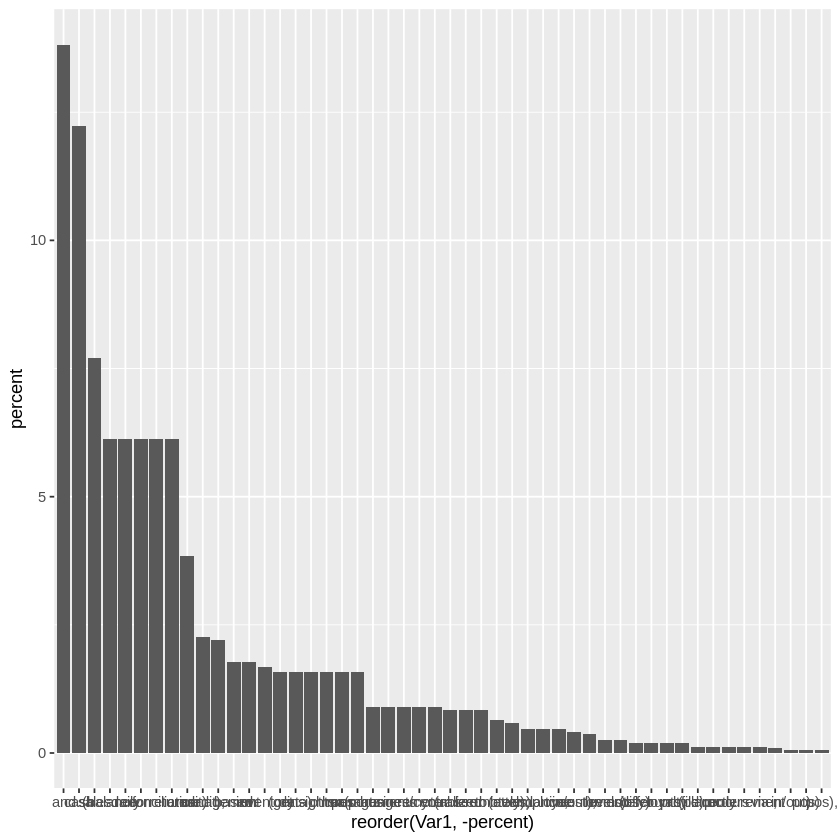

In [39]:
g_no <- df_POS_FEATURES_2 %>%
  ggplot(aes(x=reorder(Var1,-percent),y=percent)) + 
  geom_bar(stat="identity")

g_no

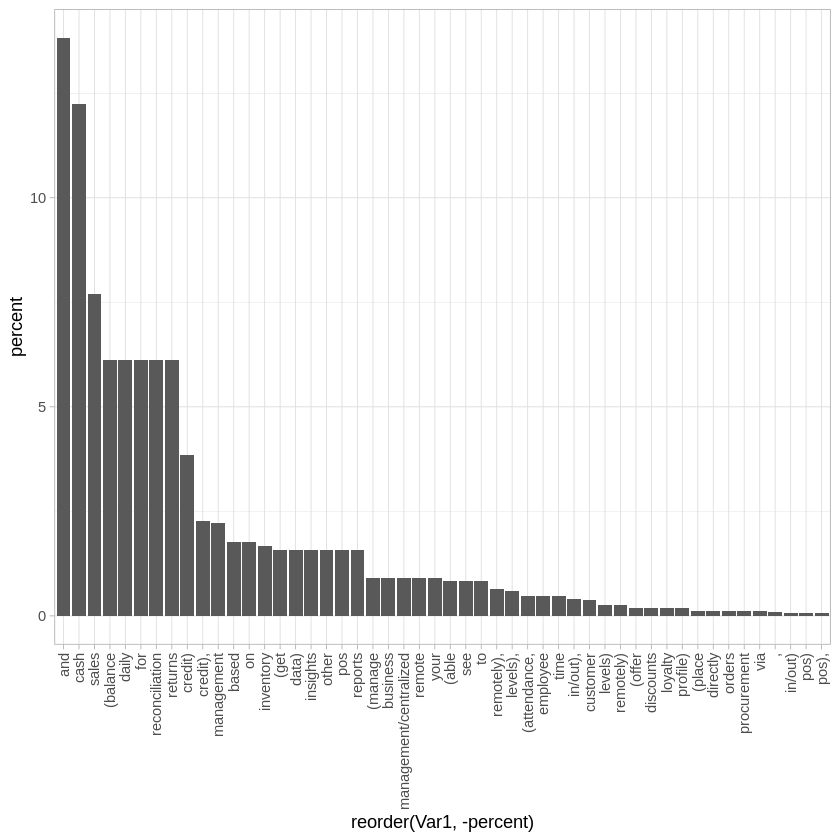

In [40]:
g121 <- g_no + scale_fill_brewer(palette = "Set2") 
g121 <- g121 + theme_light()
g121 <- g121 + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
g121

### Exp Graphs

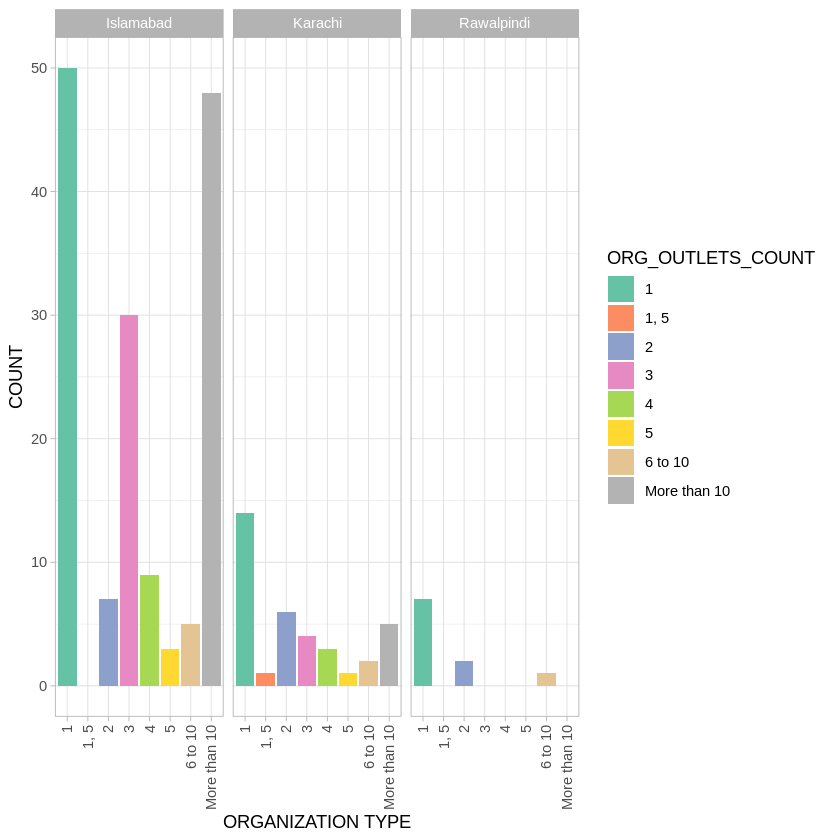

In [41]:
g1 <- df_3 %>%
    ggplot(aes(x = ORG_OUTLETS_COUNT)) +
    geom_bar(aes(fill = ORG_OUTLETS_COUNT), position = "dodge") +
    #facet_wrap(~ ORG_REGION)
    facet_wrap(~ ORG_CITY)

# bars are too little to add data labels
g1 <- g1 + labs(x = "ORGANIZATION TYPE", y = "COUNT")
g1 <- g1 + scale_fill_brewer(palette = "Set2") 
g1 <- g1 + theme_light()
g1 <- g1 + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
g1

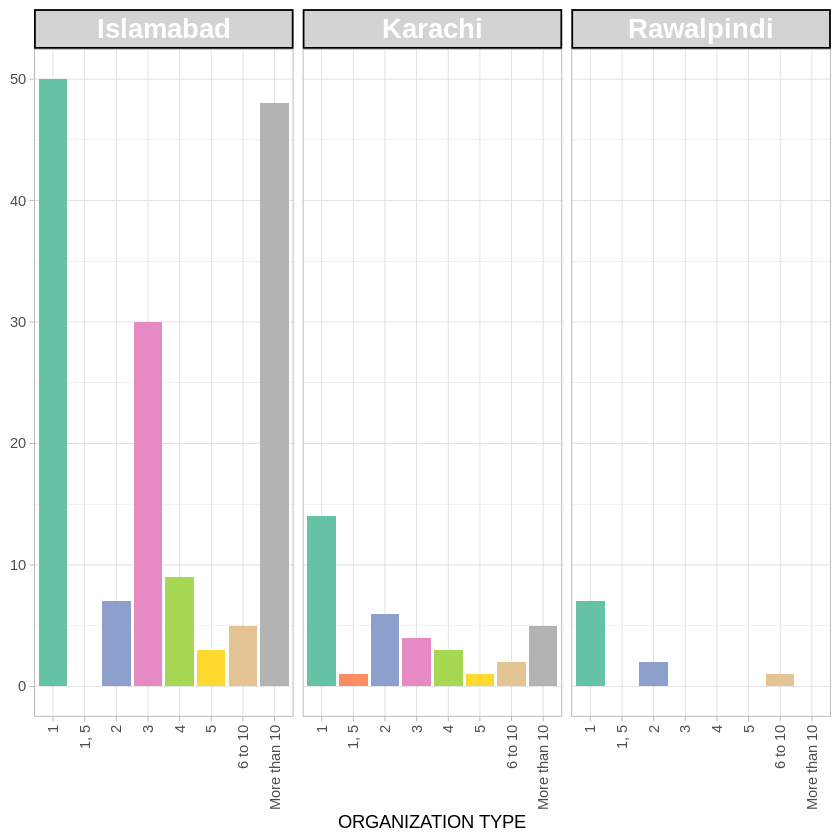

In [42]:
g11 <- g1 + theme(
    strip.text = element_text(face = "bold", size = rel(1.5)),
    strip.background = element_rect(fill = "lightgrey", colour = "black", size = 1),
    axis.title.y = element_blank(),
    legend.position = "none"
  )

g11

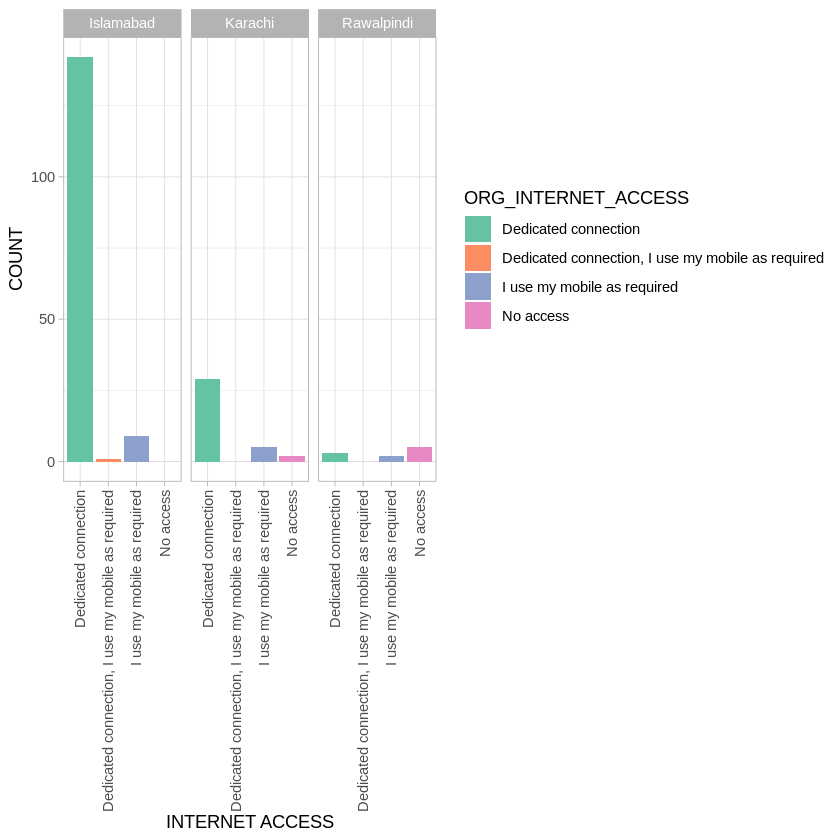

In [43]:
g1 <- df_3 %>%
    ggplot(aes(x = ORG_INTERNET_ACCESS)) +
    geom_bar(aes(fill = ORG_INTERNET_ACCESS), position = "dodge") +
    facet_wrap(~ ORG_CITY)

# bars are too little to add data labels
g1 <- g1 + labs(x = "INTERNET ACCESS", y = "COUNT")
g1 <- g1 + scale_fill_brewer(palette = "Set2") 
g1 <- g1 + theme_light()
g1 <- g1 + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
g1

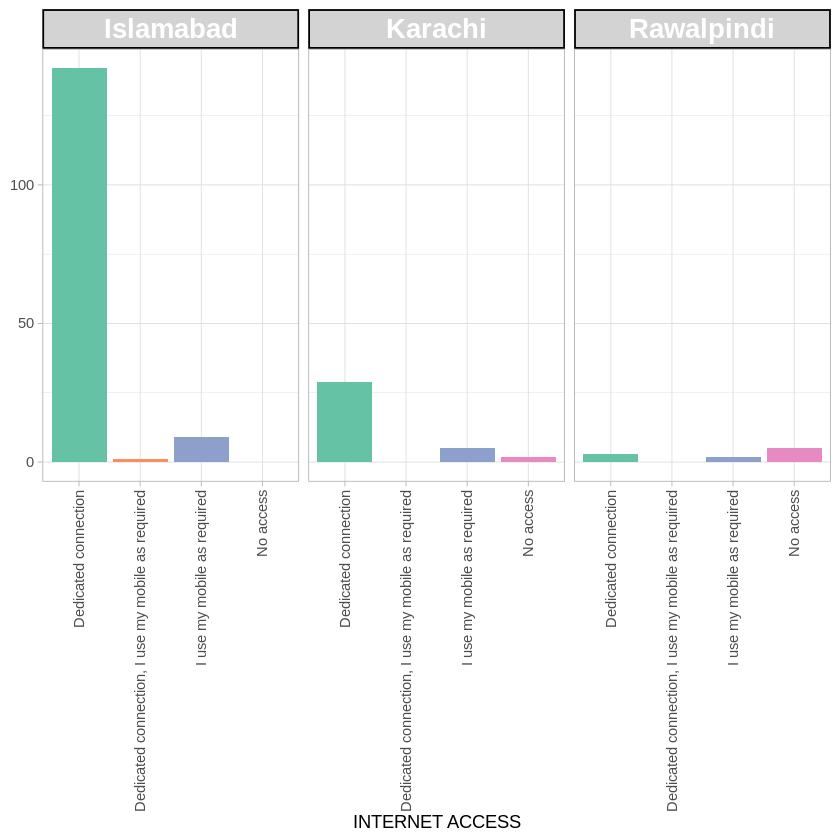

In [44]:
g11 <- g1 + theme(
    strip.text = element_text(face = "bold", size = rel(1.5)),
    strip.background = element_rect(fill = "lightgrey", colour = "black", size = 1),
    axis.title.y = element_blank(),
    legend.position = "none"
  )

g11

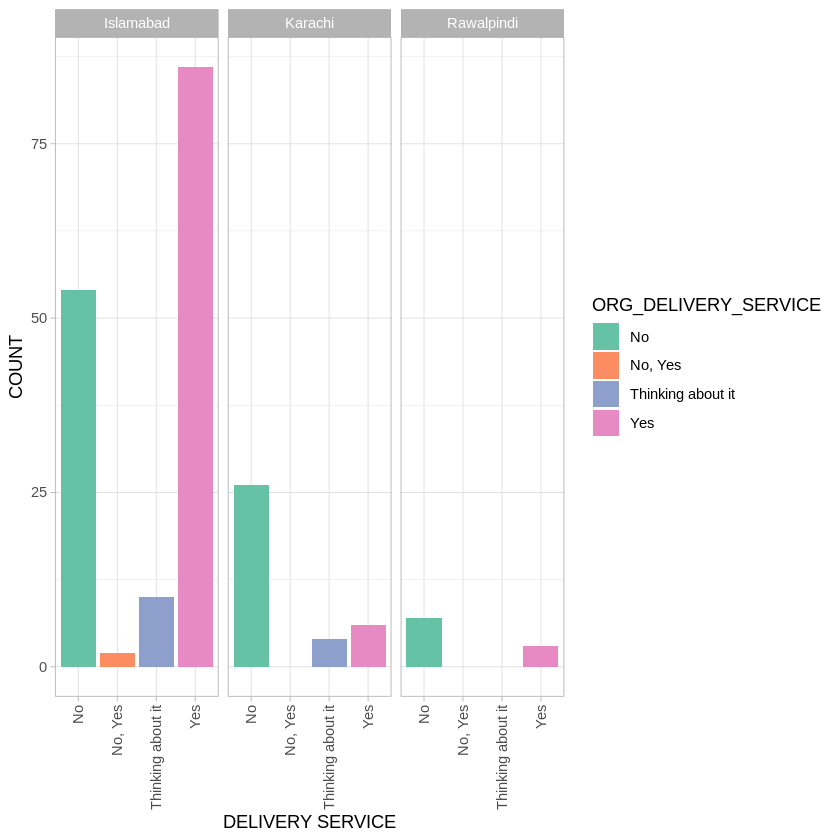

In [45]:
g1 <- df_3 %>%
    ggplot(aes(x = ORG_DELIVERY_SERVICE)) +
    geom_bar(aes(fill = ORG_DELIVERY_SERVICE), position = "dodge") +
    facet_wrap(~ ORG_CITY)

# bars are too little to add data labels
g1 <- g1 + labs(x = "DELIVERY SERVICE", y = "COUNT")
g1 <- g1 + scale_fill_brewer(palette = "Set2") 
g1 <- g1 + theme_light()
g1 <- g1 + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
g1

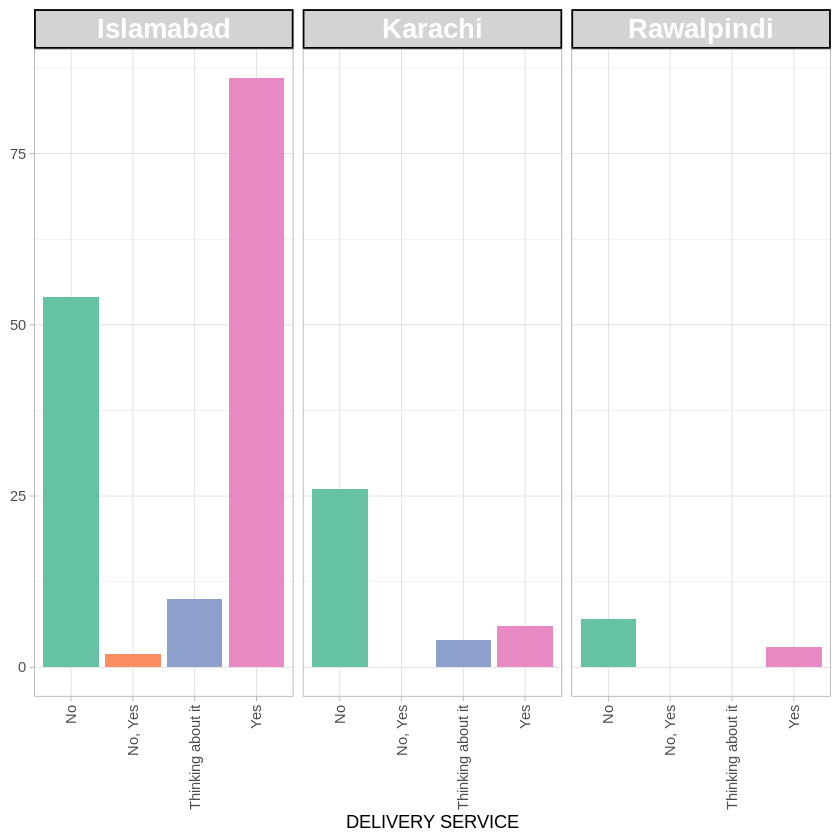

In [46]:
g11 <- g1 + theme(
    strip.text = element_text(face = "bold", size = rel(1.5)),
    strip.background = element_rect(fill = "lightgrey", colour = "black", size = 1),
    axis.title.y = element_blank(),
    legend.position = "none"
  )

g11

In [47]:
# TODO: compile counts of ORG_CUSTOMER_DATA

Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”


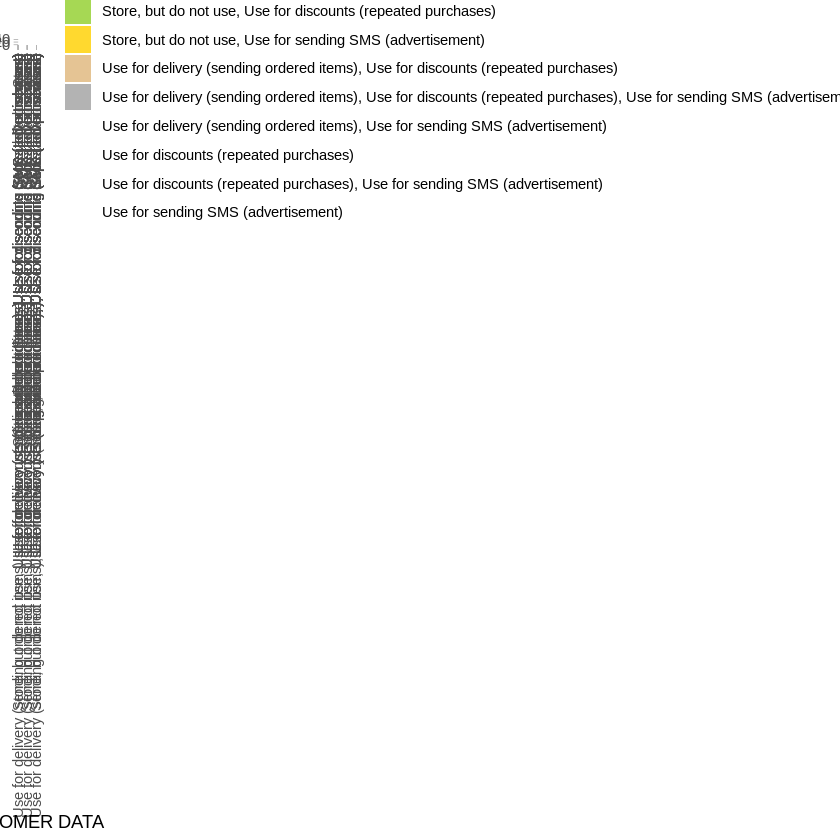

In [48]:
g1 <- df_3 %>%
    ggplot(aes(x = ORG_CUSTOMER_DATA)) +
    geom_bar(aes(fill = ORG_CUSTOMER_DATA), position = "dodge") +
    facet_wrap(~ ORG_CITY)

# bars are too little to add data labels
g1 <- g1 + labs(x = "CUSTOMER DATA", y = "COUNT")
g1 <- g1 + scale_fill_brewer(palette = "Set2") 
g1 <- g1 + theme_light()
g1 <- g1 + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
g1

### Exp Graphs Via PURRR

In [49]:
# ref: https://aosmith.rbind.io/2018/08/20/automating-exploratory-plots/

In [50]:
# list of variables to plot
colnames(df_3)

[1] "date"                                "respondent_id"                      
 [3] "employee_code"                       "user_name"                          
 [5] "SB_BU"                               "SB_DEPT"                            
 [7] "ORG_ADDRESS"                         "ORG_CITY"                           
 [9] "ORG_INTERNET_ACCESS"                 "ORG_DELIVERY_SERVICE"               
[11] "ORG_CUSTOMER_DATA"                   "ORG_PAY_FOR_OLD_POS"                
[13] "ORG_EMP_TRAINING"                    "ORG_EMP_COUNT"                      
[15] "ORG_INTERNET_DISRUPTION"             "ORG_OLD_POS_PROBLEMS"               
[17] "ORG_NEW_POS_PAYMENT_PREF"            "ORG_POS_TYPE"                       
[19] "ORG_NAME"                            "ORG_RESP_TENURE"                    
[21] "ORG_OUTLETS_COUNT"                   "ORG_OLD_POS_KIND"                   
[23] "ORG_WILLINGNESS_TO_PAY_AMOUNT"       "SB_OBSERVATION"                     
[25] "ORG_PICTURE_LINK"                    "ORG_VISITING_CARD"                  
[27] "ORG_POS_NAME"                        "ORG_POS_PROVIDER"                   
[29] "SB_REGION"                           "RESP_PHONE"                         
[31] "RESP_DESIGNATION"                    "RESP_NAME"                          
[33] "ORG_OLD_POS_LANG"                    "ORG_POS_FEATURES"                   
[35] "ORG_TYPE"                            "ORG_OLD_POS_PAYMENT_OPTIONS"        
[37] "ORG_OLD_POS_DEVICES"                 "ORG_OLD_POS_PROVIDER_PAYMENT_METHOD"
[39] "ORG_DISCOUNTS_OFFERED"               "ORG_OLD_POS_URDU_FEATURES"          
[41] "ORG_REASON_TO_REPLACE_POS"           "ORG_WILLINGNESS_DEMO"               
[43] "ORG_WILLINGNESS_FUTURE_CONTACT"

In [51]:
uni_var = c('ORG_OUTLETS_COUNT','ORG_EMP_COUNT','ORG_DELIVERY_SERVICE',
'ORG_INTERNET_ACCESS','ORG_INTERNET_DISRUPTION','ORG_POS_TYPE','ORG_OLD_POS_KIND',
'ORG_OLD_POS_LANG','ORG_OLD_POS_PROBLEMS',
'ORG_PAY_FOR_OLD_POS', 'ORG_WILLINGNESS_DEMO',
'ORG_WILLINGNESS_FUTURE_CONTACT','ORG_EMP_TRAINING',
'ORG_NEW_POS_PAYMENT_PREF')
uni_var = set_names(uni_var)
uni_var

ORG_OUTLETS_COUNT                         ORG_EMP_COUNT 
                  "ORG_OUTLETS_COUNT"                       "ORG_EMP_COUNT" 
                 ORG_DELIVERY_SERVICE                   ORG_INTERNET_ACCESS 
               "ORG_DELIVERY_SERVICE"                 "ORG_INTERNET_ACCESS" 
              ORG_INTERNET_DISRUPTION                          ORG_POS_TYPE 
            "ORG_INTERNET_DISRUPTION"                        "ORG_POS_TYPE" 
                     ORG_OLD_POS_KIND                      ORG_OLD_POS_LANG 
                   "ORG_OLD_POS_KIND"                    "ORG_OLD_POS_LANG" 
                 ORG_OLD_POS_PROBLEMS   ORG_OLD_POS_PROVIDER_PAYMENT_METHOD 
               "ORG_OLD_POS_PROBLEMS" "ORG_OLD_POS_PROVIDER_PAYMENT_METHOD" 
                  ORG_PAY_FOR_OLD_POS                  ORG_WILLINGNESS_DEMO 
                "ORG_PAY_FOR_OLD_POS"                "ORG_WILLINGNESS_DEMO" 
       ORG_WILLINGNESS_FUTURE_CONTACT                      ORG_EMP_TRAINING 
     "ORG_WILLINGNESS_FUTURE_CONTACT"                    "ORG_EMP_TRAINING" 
             ORG_NEW_POS_PAYMENT_PREF 
           "ORG_NEW_POS_PAYMENT_PREF"

TODO

In [52]:
# variables to fix (multiple choice options)
# ORG_TYPE
# ORG_DISCOUNTS_OFFERED
# ORG_CUSTOMER_DATA
# ORG_POS_FEATURES
# ORG_OLD_POS_PAYMENT_OPTIONS
# ORG_OLD_POS_DEVICES
# ORG_OLD_POS_URDU_FEATURES
# ORG_REASON_TO_REPLACE_POS
# ORG_WILLINGNESS_TO_PAY_AMOUNT
# ORG_OLD_POS_PROVIDER_PAYMENT_METHOD

ORG_TYPE
<chr>
"Clothing items, Groceries"
"Groceries (bakeman), Other (bakeman)"
"Electronics, Groceries, Stationary"
Groceries
Footwear
Clothing items
"Clothing items, Footwear"
"Groceries, Mobile Phones"
"Footwear, Groceries"


#### Plotting WorkHorse

In [53]:
bar_fun = function(x, y) {
     ggplot(df_3, aes(x = .data[[x]]) ) +
     geom_bar(aes(fill = .data[[x]]), position = "dodge") +
     facet_wrap(~ .data[[y]]) +
     
     # bars are too little to add data labels
     labs(x = x, y = "COUNT") +
     scale_fill_brewer(palette = "Set2") +
     theme_light() +
     theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
     theme(strip.text = element_text(face = "bold", size = rel(1.5)),
     strip.background = element_rect(fill = "lightgrey", colour = "black", size = 1),
     axis.title.y = element_blank(),
     legend.position = "none"
  )
}

In [54]:
#bar_fun("ORG_DELIVERY_SERVICE", "ORG_CITY")

#### Plotting WorkHorse (Proportions)

In [178]:
bar_prop_fun = function(x, y) {
  
    ggplot(df_3, aes(x = .data[[x]], group = .data[[y]]) ) + 
    geom_bar(aes(y = ..prop.., fill = factor(..x..)), stat="count") +
    geom_text(aes( label = scales::percent(..prop..,accuracy=0.1),
                  y= ..prop.. ), stat= "count", 
                  vjust = -.5, size=2 ) +
    facet_grid(~ .data[[y]]) +
    scale_y_continuous(labels = scales::percent) +

    # bars are too little to add data labels
     labs(x = x, y = "COUNT") +
     scale_fill_brewer(palette = "Set2") +
     theme_light() +
     theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
     theme(strip.text = element_text(face = "bold", size = rel(1.5)),
     strip.background = element_rect(fill = "lightgrey", colour = "black", size = 1),
     axis.title.y = element_blank(),
     legend.position = "none")
}

In [179]:
#bar_prop_fun("ORG_PAY_FOR_OLD_POS","ORG_CITY")

In [180]:

# Now using MAP, fixing facet variable to ORG_CITY
#uni_plots = map(uni_var, ~bar_fun(.x, "ORG_CITY") )
uni_plots = map(uni_var, ~bar_prop_fun(.x, "ORG_CITY") )

Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”


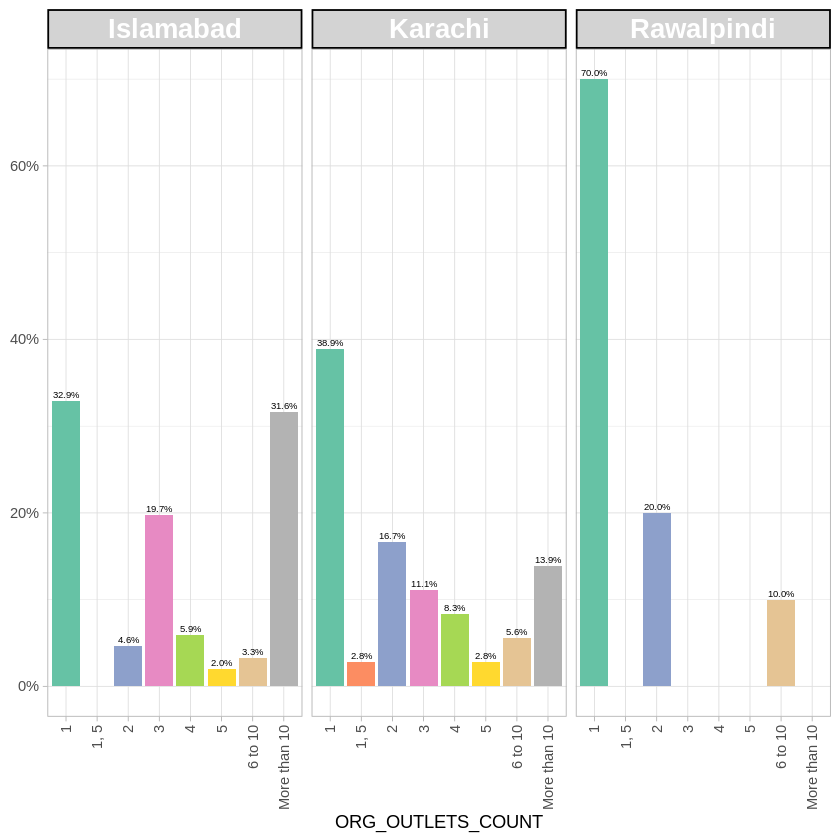

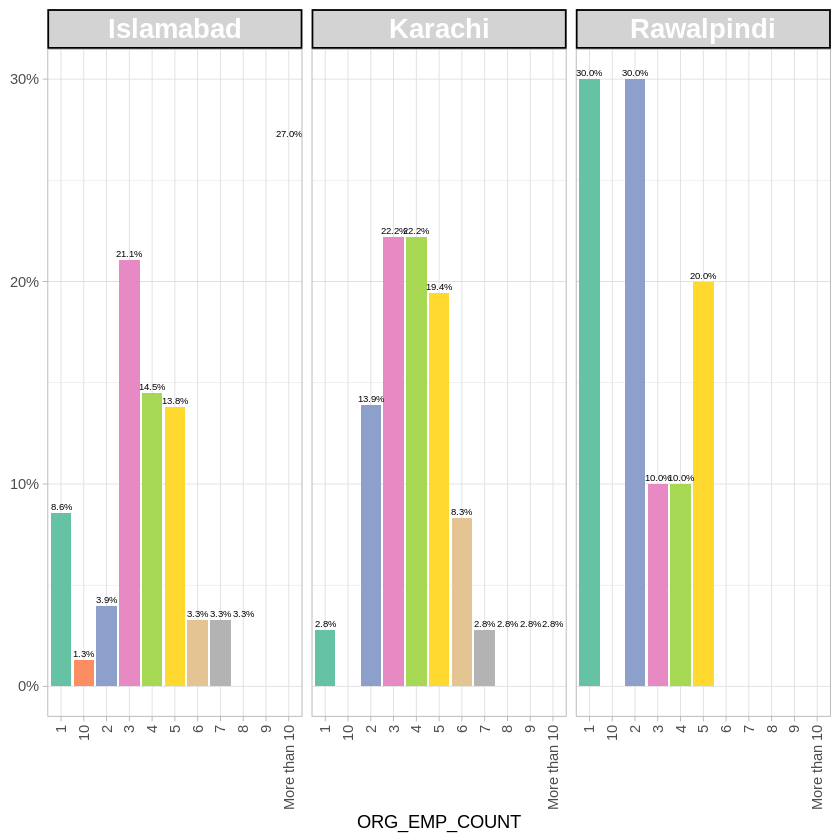

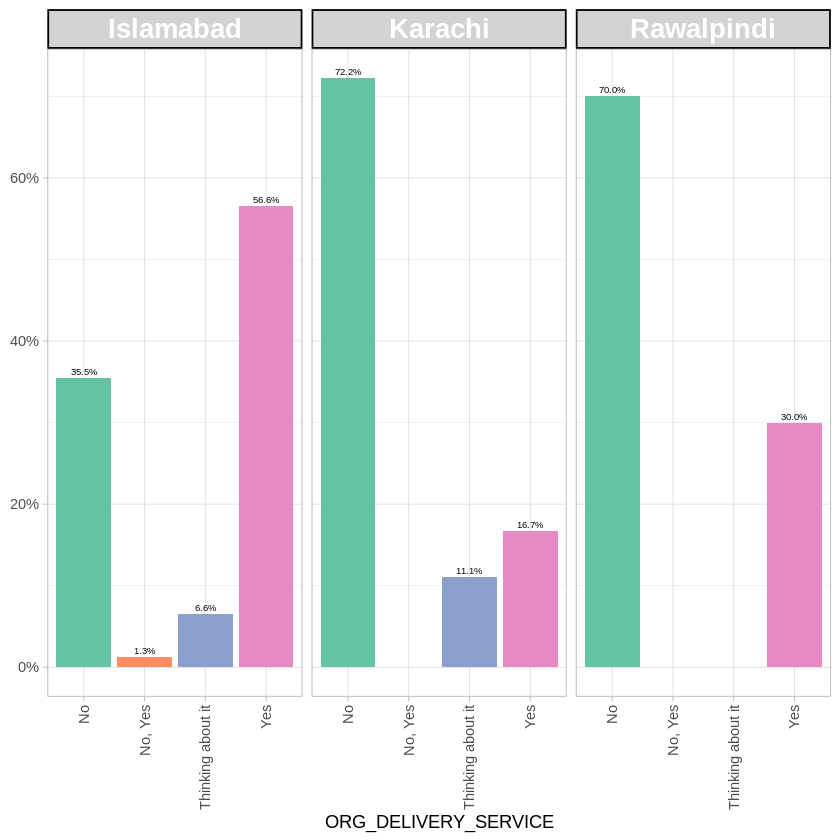

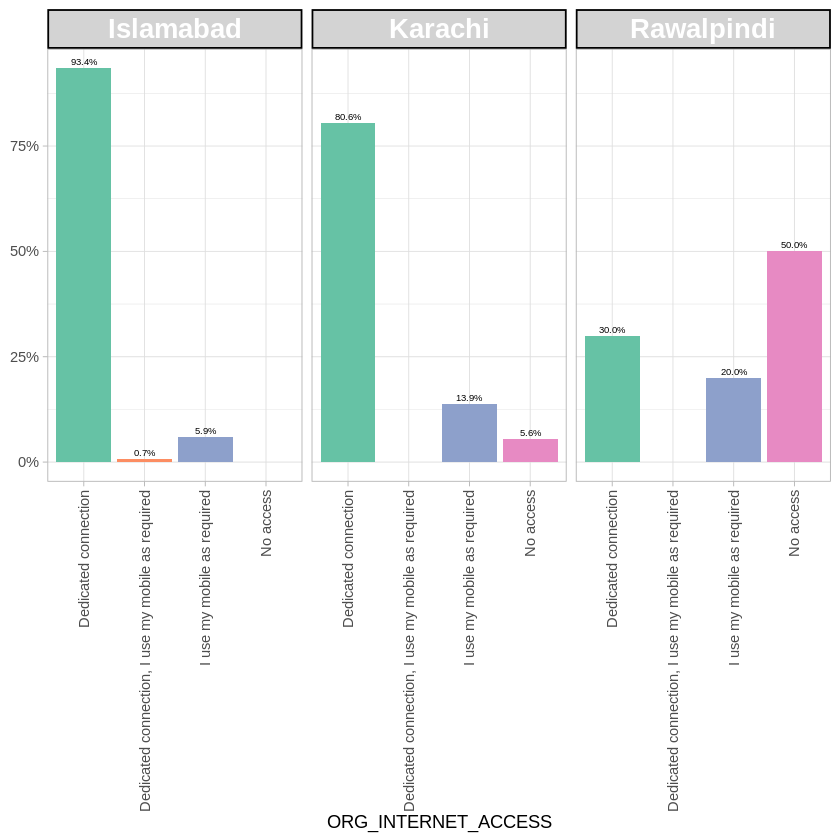

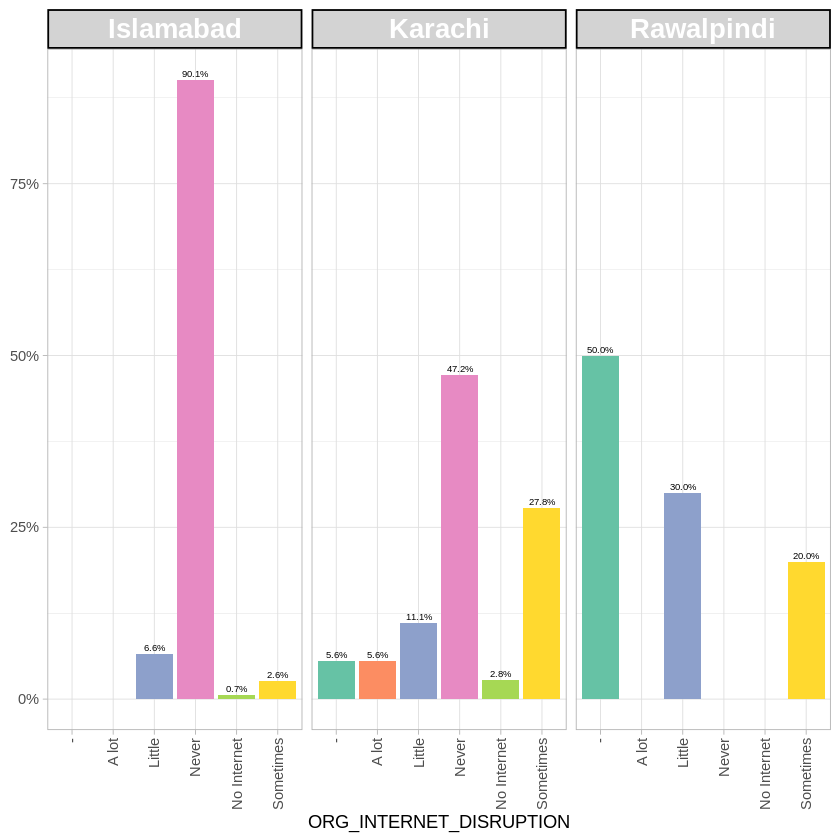

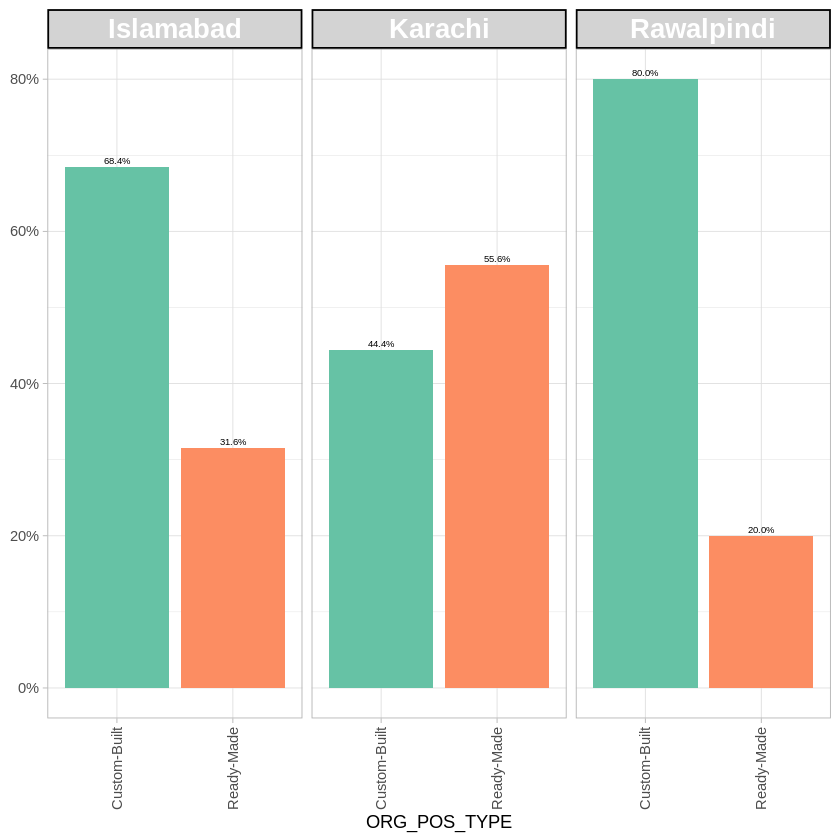

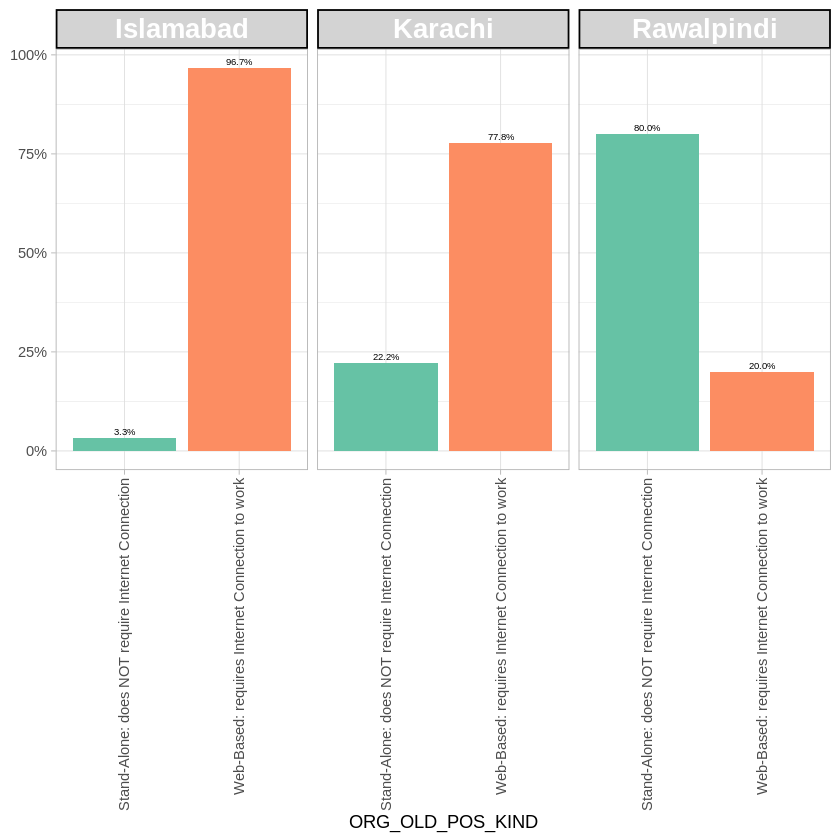

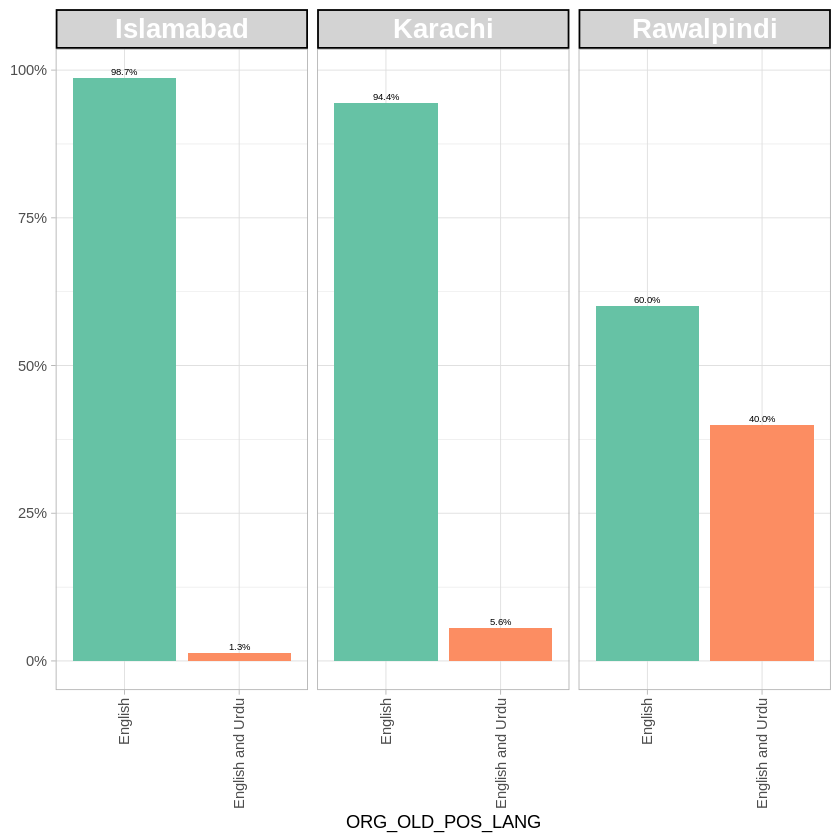

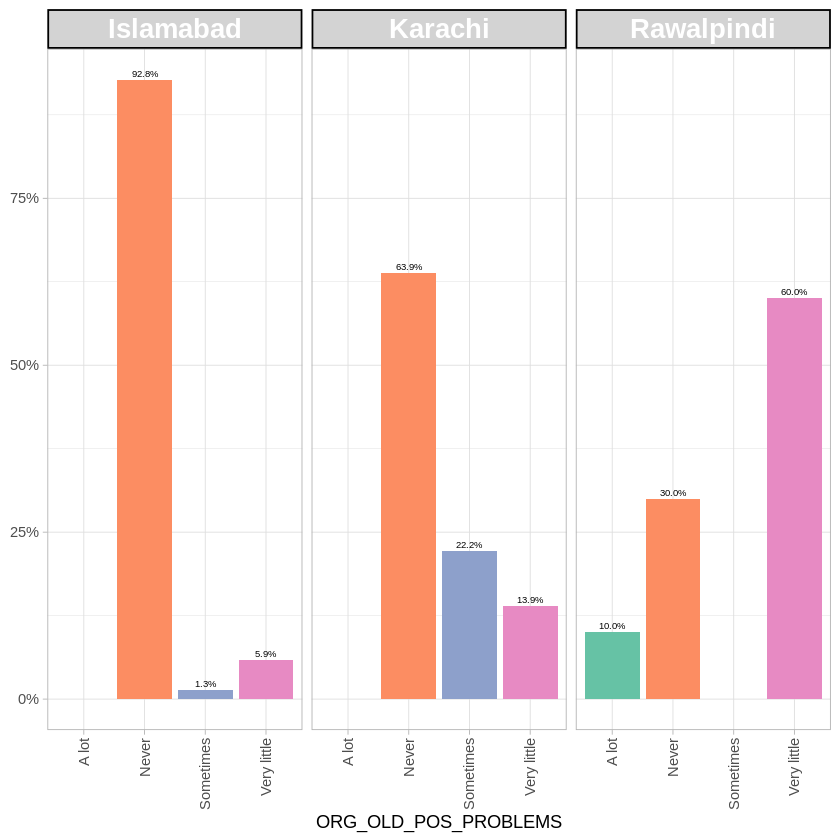

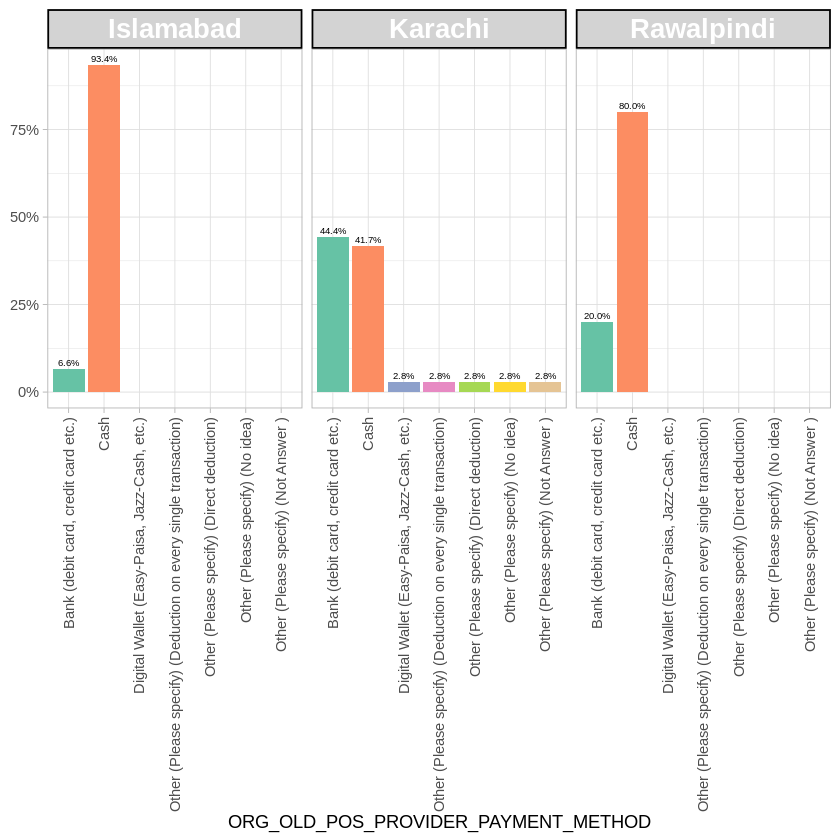

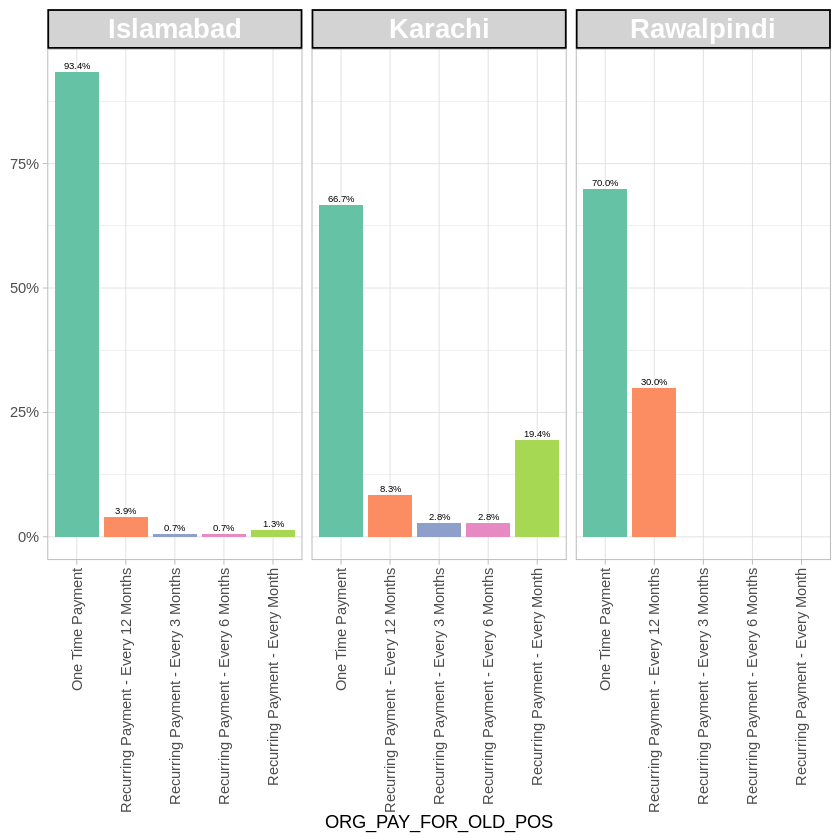

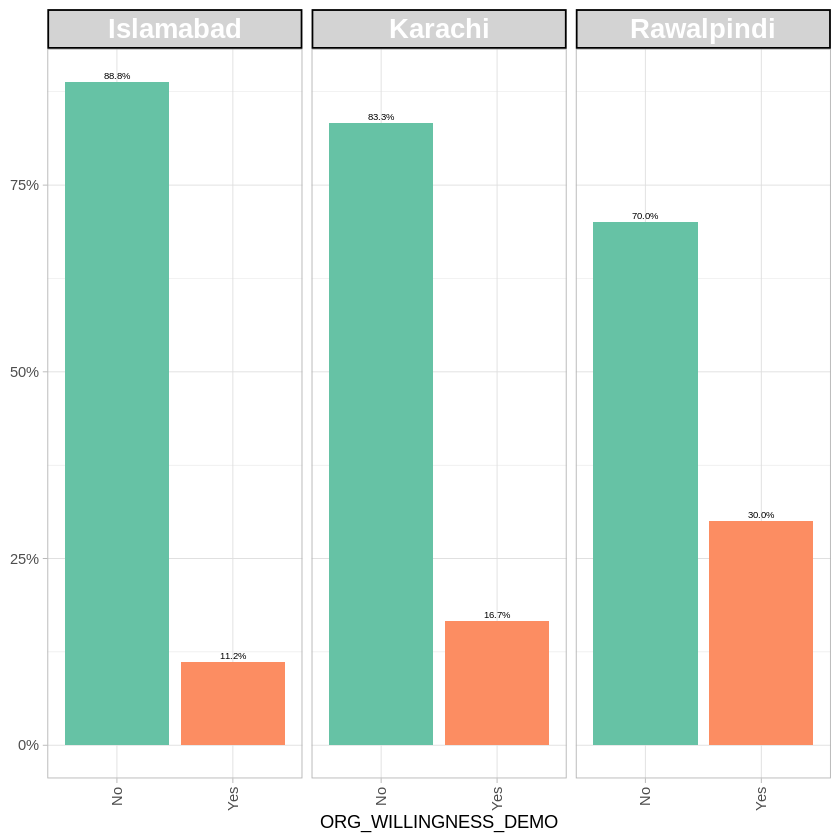

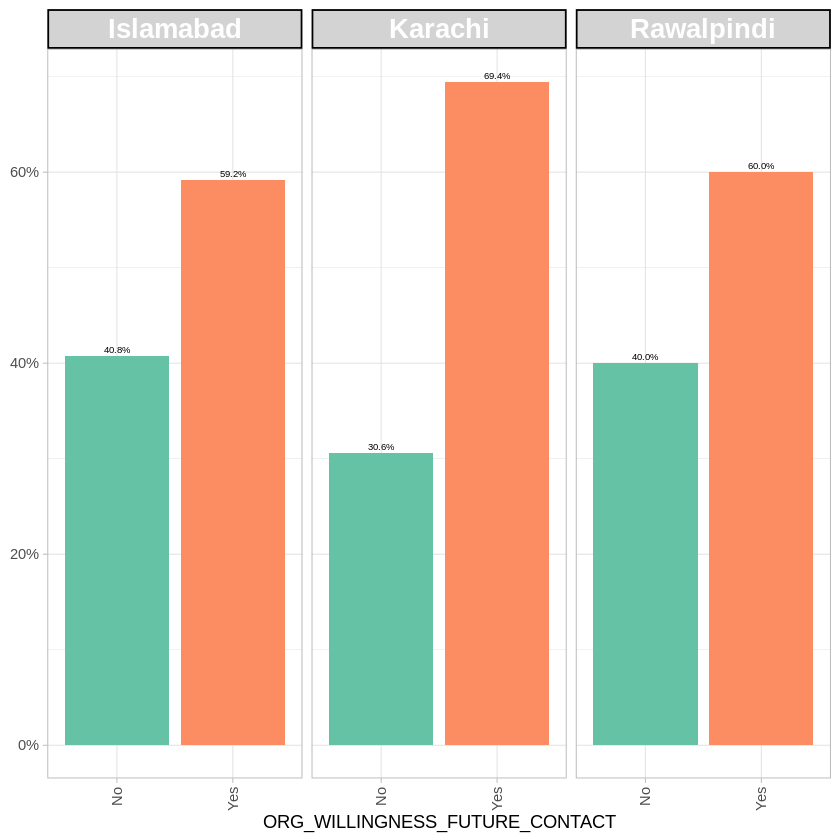

$ORG_OUTLETS_COUNT

$ORG_EMP_COUNT

$ORG_DELIVERY_SERVICE

$ORG_INTERNET_ACCESS

$ORG_INTERNET_DISRUPTION

$ORG_POS_TYPE

$ORG_OLD_POS_KIND

$ORG_OLD_POS_LANG

$ORG_OLD_POS_PROBLEMS

$ORG_OLD_POS_PROVIDER_PAYMENT_METHOD

$ORG_PAY_FOR_OLD_POS

$ORG_WILLINGNESS_DEMO

$ORG_WILLINGNESS_FUTURE_CONTACT

$ORG_EMP_TRAINING

$ORG_NEW_POS_PAYMENT_PREF


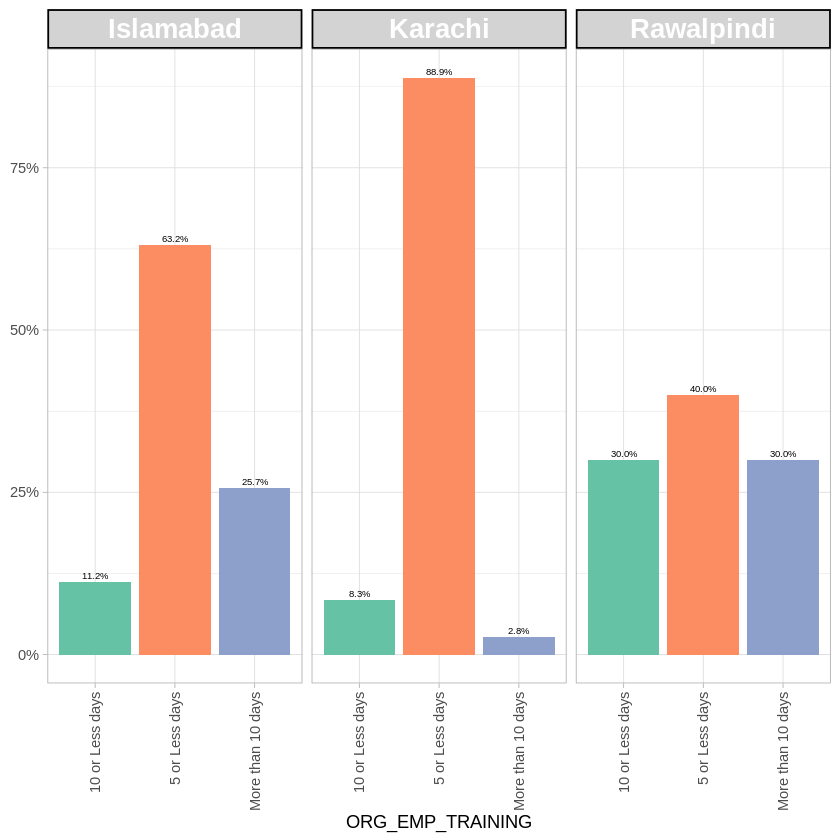

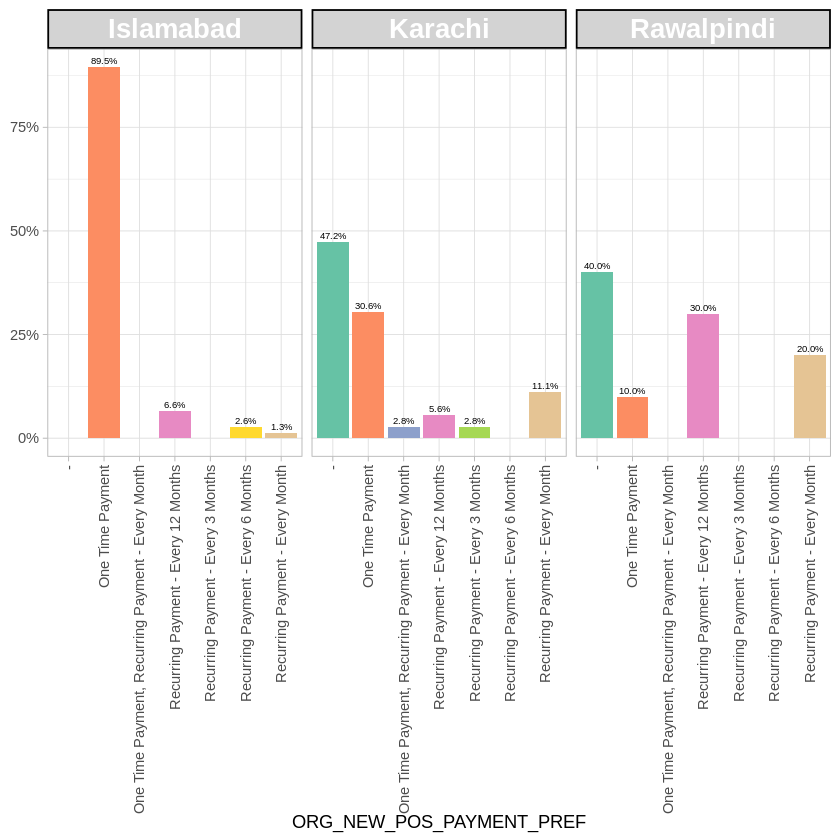

In [181]:
uni_plots

In [163]:
# SB_REGION should be plotted, without facetting
#'SB_REGION'

In [164]:
# printing the plots
pdf("all_scatterplots.pdf")
uni_plots
dev.off()

Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”


$ORG_OUTLETS_COUNT

$ORG_EMP_COUNT

$ORG_DELIVERY_SERVICE

$ORG_INTERNET_ACCESS

$ORG_INTERNET_DISRUPTION

$ORG_POS_TYPE

$ORG_OLD_POS_KIND

$ORG_OLD_POS_LANG

$ORG_OLD_POS_PROBLEMS

$ORG_OLD_POS_PROVIDER_PAYMENT_METHOD

$ORG_PAY_FOR_OLD_POS

$ORG_WILLINGNESS_DEMO

$ORG_WILLINGNESS_FUTURE_CONTACT

$ORG_EMP_TRAINING

$ORG_NEW_POS_PAYMENT_PREF


png 
  2

## NORTH

In [60]:
# Keep NORTH only

In [61]:
df_3 %>%
  filter(SB_BU == 'Customer Services North') -> df_with_POS_North

df_with_POS_North hereon

In [62]:
nrow(df_with_POS_North)

[1] 162

## SOUTH

In [63]:
# Keep SOUTH only

In [64]:
df_3 %>%
  filter(SB_BU == 'Customer Services South') -> df_with_POS_South

In [65]:
nrow(df_with_POS_South)

[1] 36

# Without POS

In [66]:
# reading in input File
#input_file_2 = '/content/WITHOUT - Survey Summary Report_ 20201104.xlsx'
df_m = read_xlsx(input_file_2)

In [67]:
nrow(df_m)

[1] 1210

In [68]:
# Exclude rows where User is NOT part of Field Team (such as: Burhan)

In [69]:
df_m %>%
 filter(BusinessUnit != 'Managment') -> df_100

In [70]:
nrow(df_100)

[1] 1209

## Cleaning up the col names

#### removing special characters

In [71]:
#x = df_2
y = colnames(df_100) 
colnames(df_100) = str_replace_all(y, "[^[A-Za-z0-9]]", " ") %>% str_replace_all(.,"[ ]+", " ")
colnames(df_100)

[1] "Date"                                                                                                           
 [2] "RespondentId"                                                                                                   
 [3] "EmployeeCode"                                                                                                   
 [4] "UserName"                                                                                                       
 [5] "BusinessUnit"                                                                                                   
 [6] "Department"                                                                                                     
 [7] "Address of the Outlet "                                                                                         
 [8] "City "                                                                                                          
 [9] "Do you believe having a POS will help you Improve Business "                                                    
[10] "Do you have Internet Access at your outlet "                                                                    
[11] "Do you wish to Expand your Business to more outlets "                                                           
[12] "Does your outlet offer Delivery Service "                                                                       
[13] "For which purposes do you store Customer Data "                                                                 
[14] "How many Employees do you have in this outlet "                                                                 
[15] "How much disruption in Internet Service do you face "                                                           
[16] "If you had to pay for a new POS which Payment Type would you prefer "                                           
[17] "If you will ever have a POS what Language would you like to have it in "                                        
[18] "Name of the Outlet "                                                                                            
[19] "Number of years you have owned this organization "                                                              
[20] "Please choose the Number of Outlets "                                                                           
[21] "Please choose which Kind of POS will you prefer "                                                               
[22] "Please provide an amount in PKR you are Willing to Pay corresponding to last question "                         
[23] "Please state your Personal Observations which you believe would be interesting to share about this interaction "
[24] "Please take a picture of the outlet with it s name visible"                                                     
[25] "Please take a picture of the visiting card"                                                                     
[26] "Region "                                                                                                        
[27] "Respondent s Designation "                                                                                      
[28] "Respondent s Name "                                                                                             
[29] "Respondent s Phone number "                                                                                     
[30] "What are the Most important Features in a POS You may choose multiple options "                                 
[31] "What Device s will you like to use for Accessing POS You may choose multiple options "                          
[32] "What kind of a business are you "                                                                               
[33] "What types of Payments do you accept You may choose multiple options "                                          
[34] "Which of the following Discounts do you offer to your customers "   

In [72]:
# using Janitor to clean up names
# https://cran.r-project.org/web/packages/janitor/vignettes/janitor.html#clean-data.frame-names-with-clean_names

In [73]:
df_100 = 
  df_100 %>% clean_names()

In [74]:
colnames(df_100)

[1] "date"                                                                                                          
 [2] "respondent_id"                                                                                                 
 [3] "employee_code"                                                                                                 
 [4] "user_name"                                                                                                     
 [5] "business_unit"                                                                                                 
 [6] "department"                                                                                                    
 [7] "address_of_the_outlet"                                                                                         
 [8] "city"                                                                                                          
 [9] "do_you_believe_having_a_pos_will_help_you_improve_business"                                                    
[10] "do_you_have_internet_access_at_your_outlet"                                                                    
[11] "do_you_wish_to_expand_your_business_to_more_outlets"                                                           
[12] "does_your_outlet_offer_delivery_service"                                                                       
[13] "for_which_purposes_do_you_store_customer_data"                                                                 
[14] "how_many_employees_do_you_have_in_this_outlet"                                                                 
[15] "how_much_disruption_in_internet_service_do_you_face"                                                           
[16] "if_you_had_to_pay_for_a_new_pos_which_payment_type_would_you_prefer"                                           
[17] "if_you_will_ever_have_a_pos_what_language_would_you_like_to_have_it_in"                                        
[18] "name_of_the_outlet"                                                                                            
[19] "number_of_years_you_have_owned_this_organization"                                                              
[20] "please_choose_the_number_of_outlets"                                                                           
[21] "please_choose_which_kind_of_pos_will_you_prefer"                                                               
[22] "please_provide_an_amount_in_pkr_you_are_willing_to_pay_corresponding_to_last_question"                         
[23] "please_state_your_personal_observations_which_you_believe_would_be_interesting_to_share_about_this_interaction"
[24] "please_take_a_picture_of_the_outlet_with_it_s_name_visible"                                                    
[25] "please_take_a_picture_of_the_visiting_card"                                                                    
[26] "region"                                                                                                        
[27] "respondent_s_designation"                                                                                      
[28] "respondent_s_name"                                                                                             
[29] "respondent_s_phone_number"                                                                                     
[30] "what_are_the_most_important_features_in_a_pos_you_may_choose_multiple_options"                                 
[31] "what_device_s_will_you_like_to_use_for_accessing_pos_you_may_choose_multiple_options"                          
[32] "what_kind_of_a_business_are_you"                                                                               
[33] "what_types_of_payments_do_you_accept_you_may_choose_multiple_options"                                          
[34] "which_of_the_following_discounts_do_you_offer_to_your_customers"                                     

#### column mapping

In [75]:
#### column mapping

In [76]:
df_101 = df_100 %>% rename(
RESP_ID = 'respondent_id',
SB_EMP_CODE = 'employee_code',
SB_USER_NAME = 'user_name',
SB_BU = 'business_unit',
SB_DEPT = 'department',
ORG_ADDRESS = 'address_of_the_outlet',
ORG_CITY = 'city',
ORG_POS_BUSINESS_IMPROVEMENT = 'do_you_believe_having_a_pos_will_help_you_improve_business',
ORG_INTERNET_ACCESS = 'do_you_have_internet_access_at_your_outlet',
ORG_EXPAND_BUSINESS = 'do_you_wish_to_expand_your_business_to_more_outlets',
ORG_DELIVERY_SERVICE = 'does_your_outlet_offer_delivery_service',
ORG_CUSTOMER_DATA = 'for_which_purposes_do_you_store_customer_data',
ORG_EMP_COUNT = 'how_many_employees_do_you_have_in_this_outlet',
ORG_INTERNET_DISRUPTION = 'how_much_disruption_in_internet_service_do_you_face',
ORG_NEW_POS_PAYMENT_PREF = 'if_you_had_to_pay_for_a_new_pos_which_payment_type_would_you_prefer',
ORG_NEW_POS_LANG_PREF = 'if_you_will_ever_have_a_pos_what_language_would_you_like_to_have_it_in',
ORG_NAME = 'name_of_the_outlet',
ORG_RESP_TENURE = 'number_of_years_you_have_owned_this_organization',
ORG_OUTLETS_COUNT = 'please_choose_the_number_of_outlets',
ORG_NEW_POS_KIND = 'please_choose_which_kind_of_pos_will_you_prefer',
ORG_WILLINGNESS_TO_PAY_AMOUNT = 'please_provide_an_amount_in_pkr_you_are_willing_to_pay_corresponding_to_last_question',
SB_OBSERVATION = 'please_state_your_personal_observations_which_you_believe_would_be_interesting_to_share_about_this_interaction',
ORG_PICTURE_LINK = 'please_take_a_picture_of_the_outlet_with_it_s_name_visible',
ORG_VISITING_CARD = 'please_take_a_picture_of_the_visiting_card',
SB_REGION = 'region',
RESP_DESIGNATION = 'respondent_s_designation',
RESP_NAME = 'respondent_s_name',
RESP_PHONE = 'respondent_s_phone_number',
ORG_POS_FEATURES = 'what_are_the_most_important_features_in_a_pos_you_may_choose_multiple_options',
ORG_NEW_POS_DEVICES = 'what_device_s_will_you_like_to_use_for_accessing_pos_you_may_choose_multiple_options',
ORG_TYPE = 'what_kind_of_a_business_are_you',
ORG_CURRENT_PAYMENT_OPTIONS = 'what_types_of_payments_do_you_accept_you_may_choose_multiple_options',
ORG_DISCOUNTS_OFFERED = 'which_of_the_following_discounts_do_you_offer_to_your_customers',
ORG_URDU_FEATURES_EXPECTED = 'which_of_the_following_features_will_you_like_in_urdu_local_language_you_may_choose_multiple_options',
ORG_REASON_TO_GET_POS = 'which_of_the_following_can_be_a_reason_to_get_pos_you_may_choose_multiple_options',
ORG_REASON_TO_NOT_HAVE_POS = 'why_do_you_not_have_a_pos',
ORG_WILLINGNESS_DEMO = 'will_you_be_willing_to_run_a_demo_of_our_pos_at_your_outlet',
ORG_WILLINGNESS_FUTURE_CONTACT = 'you_have_been_very_helpful_can_we_contact_you_in_future_for_more_details'
)

## NORTH

In [77]:
# Keep NORTH only

In [78]:
df_101 %>%
  filter(SB_BU == 'Customer Services North') -> df_without_POS_North

In [79]:
nrow(df_without_POS_North)

[1] 968

## SOUTH

In [80]:
# Keep SOUTH only

In [81]:
df_101 %>%
  filter(SB_BU == 'Customer Services South') -> df_without_POS_South

In [82]:
nrow(df_without_POS_South)

[1] 241

# Writing Output Files

## Write XLSX Files

In [83]:
# formatting options for Date/Time
#https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/strptime

## NORTH

In [84]:
# North Region

In [85]:
st=format(Sys.Date(), "%Y%b%d") # Alphabetic Month Name
file_name_north=paste ("SurveyData-", st, "-North", ".xlsx", sep="")
print(file_name_north)

[1] "SurveyData-2020Nov09-North.xlsx"


In [86]:
## Create a new workbook
wb <- createWorkbook("Temp")
## Add 2 worksheets
addWorksheet(wb, "Updated With POS Survey")
addWorksheet(wb, "Updated Without POS Survey")
writeData(wb, "Updated With POS Survey", df_with_POS_North)
writeData(wb, "Updated Without POS Survey", df_without_POS_North)
#saveWorkbook(wb, "SurveyData-20201028-North.xlsx", overwrite = TRUE)
saveWorkbook(wb, file_name_north, overwrite = TRUE)


## SOUTH

In [87]:
# South Region

In [88]:
st=format(Sys.Date(), "%Y%b%d") # Alphabetic Month Name
file_name_south=paste ("SurveyData-", st, "-South", ".xlsx", sep="")
print(file_name_south)

[1] "SurveyData-2020Nov09-South.xlsx"


In [89]:
## Create a new workbook
wb <- createWorkbook("Temp")
## Add 2 worksheets
addWorksheet(wb, "Updated With POS Survey")
addWorksheet(wb, "Updated Without POS Survey")
writeData(wb, "Updated With POS Survey", df_with_POS_South)
writeData(wb, "Updated Without POS Survey", df_without_POS_South)
#saveWorkbook(wb, "SurveyData-20201028-South.xlsx", overwrite = TRUE)
saveWorkbook(wb, file_name_south, overwrite = TRUE)

## Write Summary Stats

In [90]:
Category = c('With POS', 'Without POS','With POS', 'Without POS')

In [91]:
Region = c('North','North', 'South','South')

In [92]:
Target = c(1000,1000,1000,1000)

In [93]:
Current = c(nrow(df_with_POS_North), nrow(df_without_POS_North), nrow(df_with_POS_South), nrow(df_without_POS_South))

In [94]:
df_status = tibble(Region=Region, Category=Category, Target=Target,Current=Current)

In [95]:
# Time Zones
# https://stat.ethz.ch/R-manual/R-devel/library/base/html/timezones.html

In [96]:
Sys.timezone()

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


[1] "Etc/UTC"

In [97]:
#str(OlsonNames()) ## typically close to 600 hundred names,
## typically some acronyms/aliases such as "UTC", "NZ", "MET", "Eire", ..., but
## mostly pairs (and triplets) such as "Pacific/Auckland"
#table(sl <- grepl("/", OlsonNames()))
#OlsonNames()[ !sl ] # the simple ones
#head(Osl <- strsplit(OlsonNames()[sl], "/"))
#(tOS1 <- table(vapply(Osl, `[[`, "", 1))) # Continents, countries, ...
#table(lengths(Osl))# most are pairs, some triplets
#str(Osl[lengths(Osl) >= 3])# "America" South and North ...

In [98]:
## locale-specific version of date()
#format(Sys.time(), "%a %b %d %H %M")

st=format(Sys.time(), "%d%b%Y-%H:%M:%S", tz = "UTC+05:00") # Alphabetic Month Name
file_name_status=paste ("Status-", st, ".csv", sep="")
print(file_name_status)

[1] "Status-09Nov2020-13:09:22.csv"


In [99]:
write_csv(df_status,file_name_status)